In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [58]:
df=pd.read_csv("D://firefox downloads//data.csv")

In [35]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# • Data cleaning and preprocessing steps.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [71]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

### 🧾 وصف أعمدة البيانات مع الترجمة والوظيفة

| رقم | اسم العمود | الترجمة العربية | وصف / وظيفة |
|-----|-------------|------------------|--------------|
| 0   | `diagnosis` | التشخيص | يحدد إذا كان الورم **حميد (B)** أو **خبيث (M)** |
| 1   | `radius_mean` | متوسط نصف القطر | متوسط المسافة من مركز الكتلة إلى حدود الورم |
| 2   | `texture_mean` | متوسط النسيج | قياس تنوع درجات اللون في الصورة (ملمس الورم) |
| 3   | `perimeter_mean` | متوسط المحيط | محيط الورم في الصورة |
| 4   | `area_mean` | متوسط المساحة | المساحة التي يشغلها الورم |
| 5   | `smoothness_mean` | متوسط النعومة | قياس نعومة حدود الورم |
| 6   | `compactness_mean` | متوسط الانضغاط | العلاقة بين المحيط والمساحة، تعكس مدى الانضغاط |
| 7   | `concavity_mean` | متوسط التقعر | مدى تقعر حدود الورم |
| 8   | `concave points_mean` | متوسط النقاط المقعرة | عدد النقاط التي تُظهر تقعرًا في الحدود |
| 9   | `symmetry_mean` | متوسط التماثل | مدى تماثل شكل الورم |
| 10  | `fractal_dimension_mean` | متوسط البعد الكسري | تعقيد الحدود الخارجية للورم |
| 11  | `radius_se` | الانحراف المعياري لنصف القطر | التشتت في قيم نصف القطر |
| 12  | `texture_se` | الانحراف المعياري للنسيج | التشتت في ملمس الورم |
| 13  | `perimeter_se` | الانحراف المعياري للمحيط | التشتت في محيط الورم |
| 14  | `area_se` | الانحراف المعياري للمساحة | التشتت في مساحة الورم |
| 15  | `smoothness_se` | الانحراف المعياري للنعومة | التشتت في نعومة الحدود |
| 16  | `compactness_se` | الانحراف المعياري للانضغاط | التشتت في مدى انضغاط الكتلة |
| 17  | `concavity_se` | الانحراف المعياري للتقعر | التشتت في تقعر الحدود |
| 18  | `concave points_se` | الانحراف المعياري للنقاط المقعرة | التشتت في عدد النقاط المقعرة |
| 19  | `symmetry_se` | الانحراف المعياري للتماثل | التشتت في تماثل الشكل |
| 20  | `fractal_dimension_se` | الانحراف المعياري للبعد الكسري | التشتت في تعقيد الحدود |
| 21  | `radius_worst` | أسوأ قيمة لنصف القطر | أعلى قيمة مسجلة لنصف القطر |
| 22  | `texture_worst` | أسوأ قيمة للنسيج | أعلى قيمة لملمس الورم |
| 23  | `perimeter_worst` | أسوأ قيمة للمحيط | أعلى قيمة لمحيط الورم |
| 24  | `area_worst` | أسوأ قيمة للمساحة | أعلى مساحة تم تسجيلها |
| 25  | `smoothness_worst` | أسوأ قيمة للنعومة | أعلى نعومة تم تسجيلها للحدود |
| 26  | `compactness_worst` | أسوأ قيمة للانضغاط | أعلى قيمة لانضغاط الكتلة |
| 27  | `concavity_worst` | أسوأ قيمة للتقعر | أعلى تقعر في حدود الورم |
| 28  | `concave points_worst` | أسوأ قيمة للنقاط المقعرة | أعلى عدد للنقاط المقعرة |
| 29  | `symmetry_worst` | أسوأ قيمة للتماثل | أعلى تماثل في شكل الورم |
| 30  | `fractal_dimension_worst` | أسوأ قيمة للبعد الكسري | أعلى قيمة لتعقيد حدود الورم |
| 31  | `Unnamed: 32` | عمود غير مستخدم | لا يحتوي على بيانات، ويمكن حذفه |


# we are going to make an encoding and feature scaling 

In [72]:
X=df.drop(columns=["diagnosis", "id"])
Y=df['diagnosis'].apply(lambda x:1 if x=='M' else 0)

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
Y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# here we are selecting the feature and making ligistic model 

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# we are here in evalution the model  Model Evaluation:
# • Generate a confusion matrix.
# • Visualize the confusion matrix using seaborn

In [78]:
y_pred=logistic_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.90      0.92      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [80]:
confusion=confusion_matrix(y_test, y_pred)
print(confusion)

[[71  4]
 [ 3 36]]


In [ ]:
accuracy = logistic_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.94


Text(0.5, 1.0, 'Confusion Matrix')

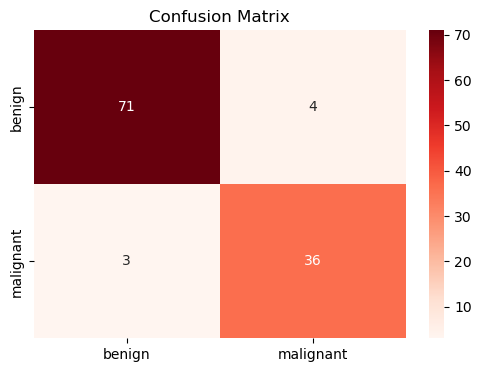

In [91]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.title('Confusion Matrix')
